In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

## Small Image Classification Using Convolutional Neural Network (CNN)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape


(10000, 32, 32, 3)

WE can clearly see that we have 5000 images and 1000 test images

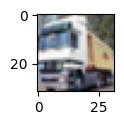

In [6]:
plt.figure(figsize=(10,1))
plt.imshow( X_train[1])

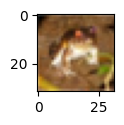

In [7]:
plt.figure(figsize=(10,1))
plt.imshow(X_train[0])

In [22]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [23]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [25]:
y_test = y_test.reshape(-1 ,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [26]:
classes[9]

'truck'

In [27]:
classes[8]

'ship'

let plot some image to see what they are

In [31]:

def plot_sample(X, y, index):
    plt.figure(figsize=(10, 6)) # Set the size of the plot
    plt.imshow(X[index]) # Display the image at position `index` in X
    plt.xlabel(classes[y[index]]) # Set the label of the image based on its class

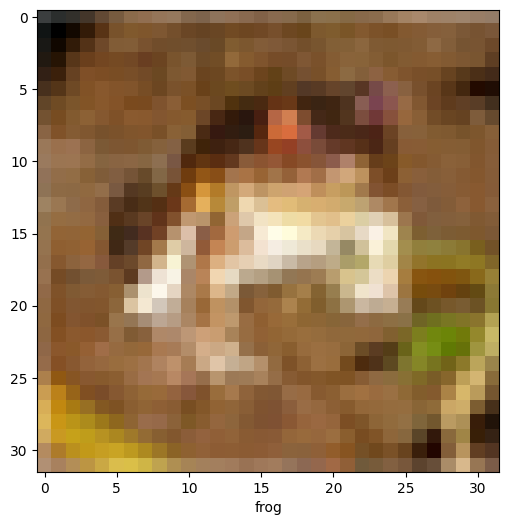

In [28]:
plot_sample(X_train, y_train, 0)

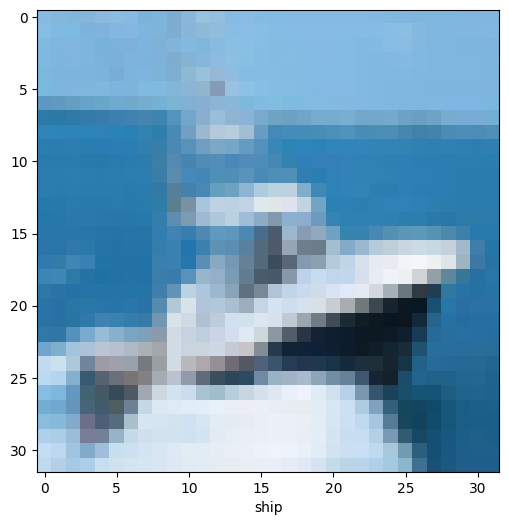

In [32]:
plot_sample(X_train,y_train ,8)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

Normalizing the training data

In [33]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build  a neural network for the raining the dataset

In [34]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

c:\Users\Hassan Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 77ms/step - accuracy: 0.3078 - loss: 1.9320
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - accuracy: 0.4186 - loss: 1.6394
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.4599 - loss: 1.5408
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.4788 - loss: 1.4900
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.4929 - loss: 1.4340


In [36]:
# Import necessary libraries
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict probabilities for the test set
y_probabilities = ann.predict(X_test)

# Convert probabilities to predicted class labels
y_pred_classes = [np.argmax(prob) for prob in y_probabilities]

# Print a detailed classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.61      0.47      0.53      1000
           1       0.72      0.49      0.59      1000
           2       0.36      0.36      0.36      1000
           3       0.31      0.46      0.37      1000
           4       0.49      0.34      0.40      1000
           5       0.49      0.26      0.34      1000
           6       0.40      0.72      0.52      1000
           7       0.50      0.61      0.55      1000
           8       0.64      0.59      0.61      1000
           9       0.60      0.55      0.57      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000



Sigmoid: Best for binary outputs. Gives a probability for a single class.
Softmax: Best for multi-class outputs. Normalizes outputs into a probability distribution.


Now let us build a convolutional neural network to train our images

Input Image: 32×32×3 image goes into the CNN.
Convolutional Layers: Extract features like edges, shapes, and textures.
Pooling Layers: Reduce image size while keeping important features.
Flatten Layer: Converts the image into a vector.
Dense Layers: Combine features to make predictions.
Output Layer: Predicts probabilities for each class.


filters=32: The layer will learn 32 patterns (or filters) from the image. Each filter looks for a specific feature in the image (like a vertical line or a curve).
kernel_size=(3, 3): The size of the filter (3x3 pixels). It slides over the image to check for patterns.
activation='relu': Keeps only positive values (helps the model focus on meaningful patterns).
input_shape=(32, 32, 3): Specifies the size of input images (32x32 pixels, 3 color channels).

In [40]:
cnn=models.Sequential([
    layers.Conv2D(filters=32 ,kernel_size=(3,3),activation='relu' , input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10, activation='softmax')

])

c:\Users\Hassan Ali\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


loss='sparse_categorical_crossentropy': Measures how wrong the model's predictions are for a multi-class classification problem with integer-encoded labels.

In [41]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.3836 - loss: 1.6865
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6084 - loss: 1.1143
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6604 - loss: 0.9853
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6891 - loss: 0.9041
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7094 - loss: 0.8340
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7350 - loss: 0.7738
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 87ms/step - accuracy: 0.7514 - loss: 0.7135
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 104s 53ms/step - accuracy: 0.7667 - loss: 0.6688
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7780 - loss: 0.6307
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7923 - loss: 0.5902


In [43]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7045 - loss: 0.8895


[0.9227083921432495, 0.6985999941825867]

In [44]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


array([[1.46738657e-05, 9.29924113e-07, 4.62918426e-04, 8.93778503e-01,
        2.51471938e-05, 1.03283837e-01, 2.33011576e-03, 3.63619188e-06,
        1.00223180e-04, 2.41628264e-08],
       [4.03147453e-04, 1.29243394e-03, 3.50563845e-08, 1.80010588e-07,
        6.38706688e-09, 1.90512994e-10, 1.74526471e-09, 3.63662885e-11,
        9.98289883e-01, 1.42606796e-05],
       [1.15528755e-01, 7.48023465e-02, 1.34319917e-03, 1.57296900e-02,
        7.58894952e-04, 1.69042475e-03, 1.18342252e-03, 1.28893205e-03,
        7.73620486e-01, 1.40538579e-02],
       [9.63279724e-01, 1.18825014e-03, 9.43520945e-03, 1.73096324e-03,
        8.62329849e-04, 4.85262353e-06, 2.72607685e-05, 7.86771488e-05,
        2.33592559e-02, 3.35776494e-05],
       [3.89318899e-07, 2.67091964e-04, 5.10985684e-03, 2.24675797e-02,
        9.38349605e-01, 1.15559446e-02, 2.22400222e-02, 5.53630707e-06,
        3.81570226e-06, 8.63729923e-08]], dtype=float32)

In [47]:
y_classes =[np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [48]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

<Figure size 1000x100 with 0 Axes>

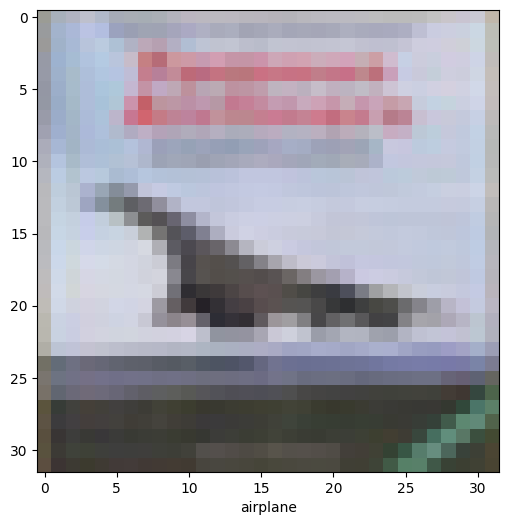

<Figure size 1000x100 with 0 Axes>

In [51]:
plot_sample(X_test , y_test ,3)
plt.figure(figsize=(10,1))

In [52]:
classes[y_classes[3]]

'airplane'

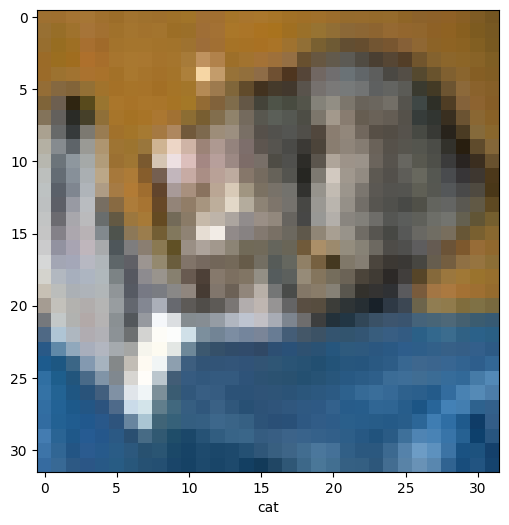

In [53]:
plot_sample(X_test , y_test, 0)

In [54]:
classes[y_classes[0]]

'cat'

In [57]:
print("Classfication_report ",classification_report(y_test, y_classes))

Classfication_report                precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.80      0.82      0.81      1000
           2       0.60      0.61      0.60      1000
           3       0.49      0.51      0.50      1000
           4       0.67      0.64      0.66      1000
           5       0.55      0.67      0.60      1000
           6       0.80      0.73      0.76      1000
           7       0.81      0.71      0.76      1000
           8       0.80      0.81      0.81      1000
           9       0.82      0.73      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

